# Response Item Network Analysis

## Import

The code imports necessary libraries, suppresses specific warnings, reloads custom modules, and enhances pandas DataFrames by attaching custom utility functions for filtering and dropping columns, adding flexibility to the DataFrame manipulation process.


In [ ]:
# Import 
import pandas as pd
import warnings
from pandas.errors import PerformanceWarning

# Suppress PerformanceWarnings
warnings.simplefilter(action='ignore', category=PerformanceWarning)

# Import custom libraries
import util
import responseItemNetwork
from util import UtilityFunctions as uf
from responseItemNetwork import ResponseItemNetwork as ResIN

# reload due to changes 
from importlib import reload
reload(util)   
reload(responseItemNetwork)  

# Monkey patch the method from the utility class to the pandas DataFrame
pd.DataFrame.filter_features = uf.filter_features
pd.DataFrame.filter_numerical_values = uf.filter_numerical_values
pd.DataFrame.filter_negative_values = uf.filter_negative_values
pd.DataFrame.filter_columns_with_less_unique_values_than_threshold = uf.filter_columns_with_less_unique_values_than_threshold
pd.DataFrame.drop_columns = uf.drop_columns

## Create test graph and visualise

This code generates a pandas DataFrame with random values for columns `a`, `b`, `c`, and `d`, applying constraints based on the values of `a` and `b`. It then uses the `ResponseItemNetwork` class to visualize and display the resulting data.



     a  b  c  d
0    2  3  2  1
1    3  1  1  2
2    3  3  2  1
3    2  3  2  1
4    3  1  1  2
..  .. .. .. ..
145  2  3  1  1
146  1  2  3  1
147  1  3  1  1
148  2  1  1  1
149  1  1  2  3

[150 rows x 4 columns]
Linearization Score Before rotation: 0.8753481607383305


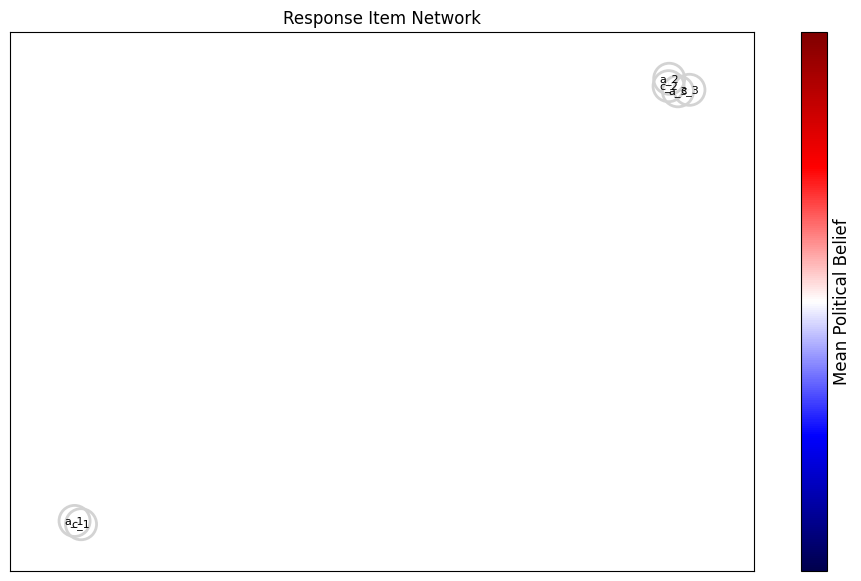

In [ ]:
import random

# Generate a pandas DataFrame with the constraints
num_rows = 150
data = []

for _ in range(num_rows):
    # Generate random answers for a and b
    a = random.choice([1, 2, 3])
    b = random.choice([1, 2, 3])
    
    # If either a or b is max (3), ensure c and d are not max
    if a == 3 or b == 3:
        c = random.choice([1, 2])
        d = random.choice([1, 2])
    else:
        # Otherwise, c and d can have any value, including max
        c = random.choice([1, 2, 3])
        d = random.choice([1, 2, 3])
    
    data.append({'a': a, 'b': b, 'c': c, 'd': d})

df = pd.DataFrame(data)
print(df)

# create mapping
mapping = {
    'a': ['a', 3, False],
    'b': ['c', 3, False],
    'c': ['a', 3, False],
    'd': ['c', 3, False]
}

resin = ResIN(df, mapping, None)
resin.visualize_graph()
print(resin)


## Load Data 

This code loads and processes CSV files from a specified folder, filters them based on a keyword in the filename, and combines the resulting data into a single pandas DataFrame.

In [ ]:
path = './../data/processed/'
files_to_load = "2018_U"
df = pd.DataFrame()
processed_files = uf.get_csv_files_from_folder(path)
for f in processed_files:
        if f.__contains__(files_to_load):
            print(f)
            df_new_set = pd.read_csv(f)
            df = pd.concat([df, df_new_set], ignore_index=True)

./../data/processed/2018_USA_2022-05-16.csv


## Select Features

This code creates a filtered version of the DataFrame based on the first 5 questions from the `question_mapping` dictionary, along with an additional column `'E033'`. It then creates a filtered version of the mapping dictionary and prints the columns of the resulting DataFrame.

In [ ]:
question_mapping = {
    'E069_07': ('Parliament Trust', 4, False),
    'D060': ('University Gender', 4, False),

    'E069_11': ('Gov Trust', 4, False),
    'E069_12': ('Party Trust', 4, False),


    'F120': ('Abortion', 10, False),

    'G052': ('Immigration Impact', 5, False),

    'D078': ('Women Executives', 4, False),

    'F119': ('Prostitution', 10, False),
    
    'F118': ('Homosexuality', 10, False),
    'F144_02': ('Death Penalty', 10, False),

    'D059': ('Women Leaders', 4, False),
    'B008': ('Environment vs Growth', 3, False),
    'F034': ('Religious Person', 2, False),
    'D026_03': ('Child Duty', 5, False),
    'E018': ('Authority Respect', 3, False),

    'E035': ('Income Equality', 10, False),
    'E036': ('State Ownership', 10, False),
    'E037': ('Gov Responsibility', 10, False),
    'E039': ('Competition', 10, False)
}

NUMBER_OF_QUESTIONS =  10 #len(question_mapping)
questions = list(question_mapping.keys())[:NUMBER_OF_QUESTIONS]
df_filtered = df.filter_features(questions + ['E033'])

# Create a new dictionary with only the first 5 keys
question_mapping_filtered = {key: question_mapping[key] for key in questions}
print(df_filtered.columns)

Index(['E069_07', 'D060', 'E069_11', 'E069_12', 'F120', 'G052', 'D078', 'F119',
       'F118', 'F144_02', 'E033'],
      dtype='object')


## Process Features Into Binary variables 

This code initializes a `ResponseItemNetwork` object using a filtered DataFrame and a subset of the question mapping. It visualizes the graph without showing node labels and prints the shape and columns of the resulting DataFrame.

Linearization Score Before rotation: 1.310950870894303


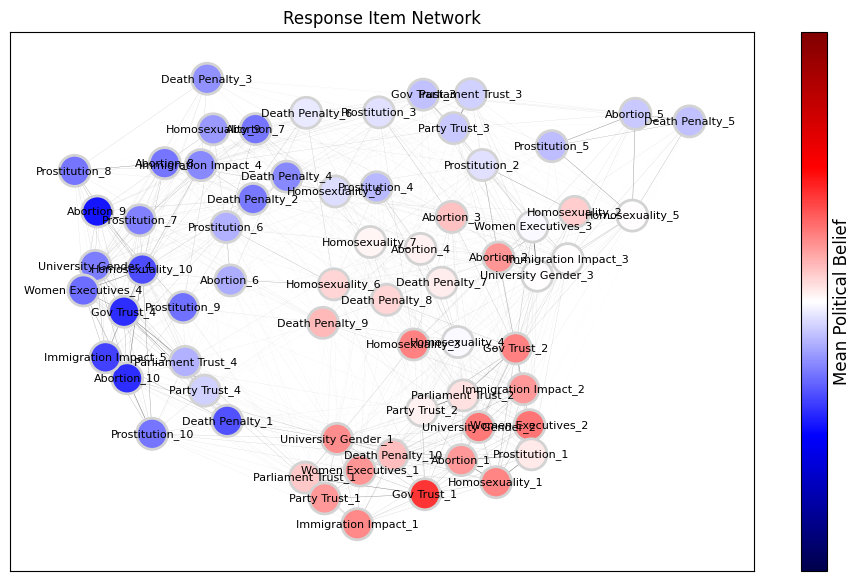

(2596, 66)
Index(['resin_political_beliefs', 'Parliament Trust_1', 'Parliament Trust_2',
       'Parliament Trust_3', 'Parliament Trust_4', 'University Gender_1',
       'University Gender_2', 'University Gender_3', 'University Gender_4',
       'Gov Trust_1', 'Gov Trust_2', 'Gov Trust_3', 'Gov Trust_4',
       'Party Trust_1', 'Party Trust_2', 'Party Trust_3', 'Party Trust_4',
       'Abortion_1', 'Abortion_2', 'Abortion_3', 'Abortion_4', 'Abortion_5',
       'Abortion_6', 'Abortion_7', 'Abortion_8', 'Abortion_9', 'Abortion_10',
       'Immigration Impact_1', 'Immigration Impact_2', 'Immigration Impact_3',
       'Immigration Impact_4', 'Immigration Impact_5', 'Women Executives_1',
       'Women Executives_2', 'Women Executives_3', 'Women Executives_4',
       'Prostitution_1', 'Prostitution_2', 'Prostitution_3', 'Prostitution_4',
       'Prostitution_5', 'Prostitution_6', 'Prostitution_7', 'Prostitution_8',
       'Prostitution_9', 'Prostitution_10', 'Homosexuality_1',
       'Homose

In [ ]:
political_belief_feature = 'E033'
resin = ResIN(df_filtered, question_mapping_filtered, political_belief_feature)
resin.visualize_graph(True) # False to not show the node labels in graph 
print(resin.df.shape)
print(resin.df.columns)